In [1]:
%reload_ext autoreload

# Imports

import os
import sys
module_path = os.path.abspath(os.path.join('../image_gen_dm')) # or the path to your source code
sys.path.append(str(module_path))

import matplotlib.pyplot as plt
import pandas as pd

TF_ENABLE_ONEDNN_OPTS=0
os.environ['TF_ENABLE_ONEDNN_OPTS'] = str(TF_ENABLE_ONEDNN_OPTS)
os.environ['TG_GPU_ALLOCATOR'] = 'cuda_malloc_async'


In [2]:
FOLDER_PATH = 'res/histories'

files = os.listdir(FOLDER_PATH)


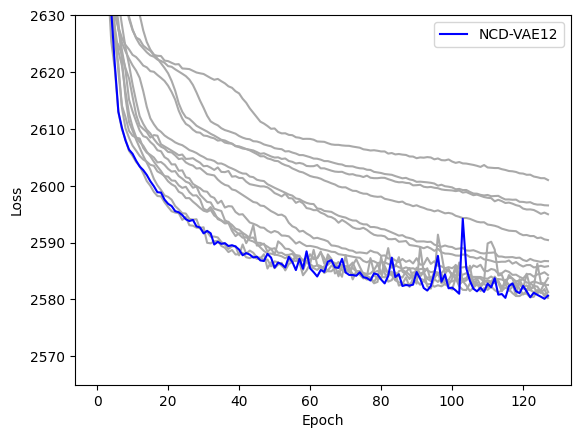

In [3]:
# Plot all histories from csv files in a directory

csv_files = [f for f in files if f.endswith('.csv')]

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.ylim(2565, 2630)

i = 0
for f in csv_files:
    if f.startswith('cvae'):
        continue
    
    if i < 14:
        df = pd.read_csv(os.path.join(FOLDER_PATH, f))
        
        name = f[:-4]
        if i == 11:
            pass
        else:
            plt.plot(df['loss'], label=None, color='darkgray')

    i += 1

df = pd.read_csv(os.path.join(FOLDER_PATH, 'ncvae12.csv'))
plt.plot(df['loss'], label='NCD-VAE12', color='blue')

plt.legend(loc="upper right")

plt.show()

In [4]:
# Loss

df = pd.read_csv('res/histories/ncvae08.csv')

df['loss_avg'] = df['loss'].rolling(window=32).mean()

print('NCD-VAE08 loss: ', df['loss_avg'].iloc[-1])

df = pd.read_csv('res/histories/ncvae12.csv')

df['loss_avg'] = df['loss'].rolling(window=32).mean()

print('NCD-VAE12 loss: ', df['loss_avg'].iloc[-1])

NCD-VAE08 loss:  2582.786460876465
NCD-VAE12 loss:  2582.413475036621
